In [15]:
import numpy as np
import matplotlib.pyplot as plt
from GHA import GHA
from utils import *
np.random.seed(24)

Image shape: (256, 256)
Image dtype: float32
Image size: 65536
Image min: 0.03529412
Image max: 0.9607843
Image mean: 0.45792717
Image std: 0.19286485


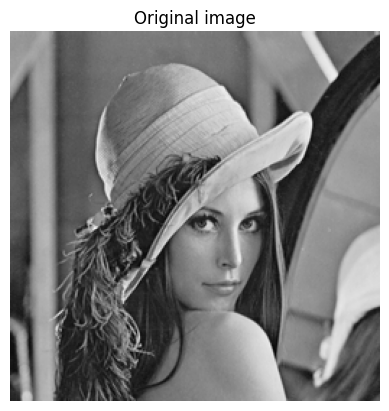

In [16]:
image = load_image('images/lenna.png')
image = image.astype(np.float32) / 255.0

print("Image shape:", image.shape)
print("Image dtype:", image.dtype)
print("Image size:", image.size)
print("Image min:", image.min())
print("Image max:", image.max())
print("Image mean:", image.mean())
print("Image std:", image.std())

plt.imshow(image, cmap='gray')
plt.title(f'Original image')
plt.axis('off')
plt.show()

In [17]:
blocks = blockify(image, 8, 8)
flattened_blocks = blocks.reshape(-1, 8*8)
print("Flattened blocks shape:", flattened_blocks.shape)
centered_blocks, mean_vector = mean_center(flattened_blocks)
#std = np.std(flattened_blocks, axis=0)
#print("std vector shape:", std.shape)
print("mean vector shape:", mean_vector.shape)
#centered_blocks /= std
#centered_blocks

Flattened blocks shape: (1024, 64)
mean vector shape: (64,)


Principal components: 


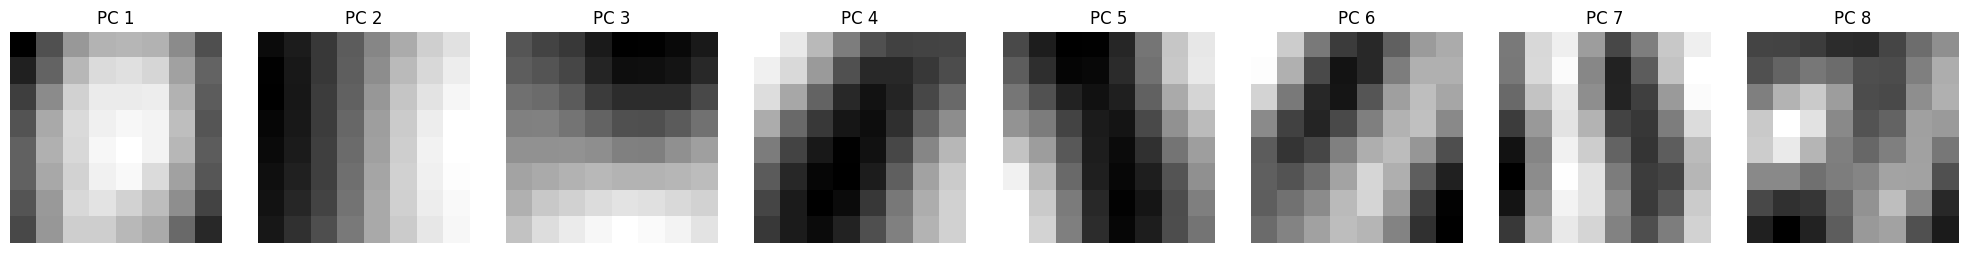

Do the converged components form a orthonormal basis: False
Components shape: (64, 64)
Encoded shape: (1024, 64)
Original image dtype: float32
Original min/max: 0.03529412 0.9607843
Original image shape: (256, 256)
Reconstructed dtype: float64
Reconstructed min/max: 0.0016780826726735532 0.9769436522538365
Reconstructed image shape: (256, 256)
MSE: 0.00022993563358934943


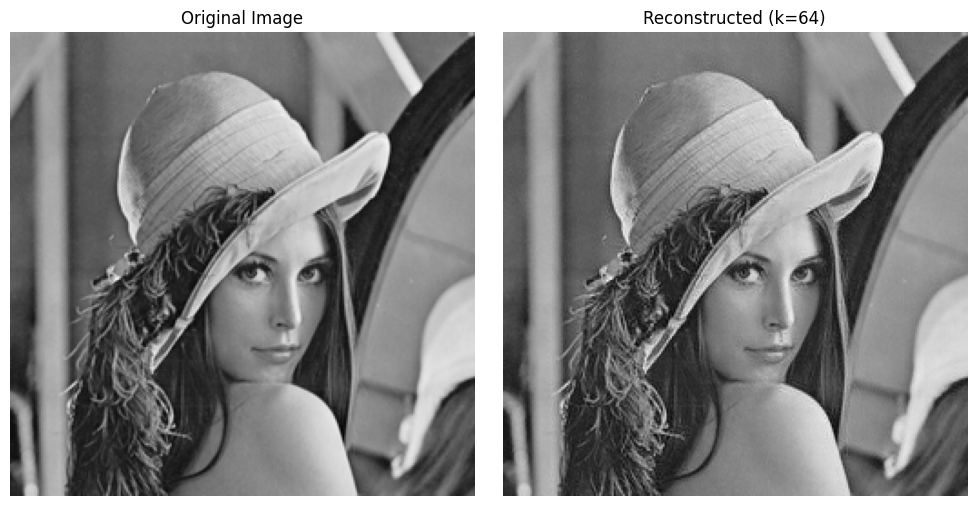

In [18]:
for k in (64,):
    gha = GHA(input_dim=64, num_components=k)
    gha.train_parallel(centered_blocks, epochs=5000, lr_s=0.001, lr_f=0.0001)
    #gha.train_sequential(centered_blocks, epochs=1000, lr_s=0.001, lr_f=0.0001)

    components = gha.get_components()
    #print(components)
    #check_component_properties(components)
    print("Principal components: ")
    visualize_components(components, 1, 8)
    print(f"Do the converged components form a orthonormal basis: {np.allclose(components @ components.T, np.eye(k))}")
    print("Components shape:", components.shape)
    #print(components)

    encoded_blocks = encode_blocks(flattened_blocks, mean_vector, components)
    print(f"Encoded shape: {encoded_blocks.shape}")  # should be (1024, k)

    reconstructed_image = reconstruct_image(encoded_blocks, mean_vector, components)
    #reconstructed_flat = reconstruct_blocks(encoded_blocks, mean_vector, components)
    #reconstructed_blocks = reshape_blocks(reconstructed_flat)
    #reconstructed_image = blocks_to_image(reconstructed_blocks)

    print("Original image dtype:", image.dtype)
    print("Original min/max:", image.min(), image.max())
    print("Original image shape:", image.shape)

    print("Reconstructed dtype:", reconstructed_image.dtype)
    print("Reconstructed min/max:", reconstructed_image.min(), reconstructed_image.max())
    print("Reconstructed image shape:", reconstructed_image.shape)


    print(f"MSE: {np.mean((image - reconstructed_image) ** 2)}")
    show_original_vs_reconstructed(image, reconstructed_image, k)
    #plt.imshow(reconstructed_image, cmap='gray')
    #plt.title(f'Reconstructed Image using k={k} components')
    #plt.axis('off')
    #plt.show()